# U.S. Bank Failure Analysis 

Data: https://catalog.data.gov/dataset/fdic-failed-bank-list


The inspiration for project comes from my lifelong curiosity about recurring financial and economic problems especially after the recent 2008 recession. I will be focusing on this period of the data from 2000-2017. The data set includes data going back to 1934 and shows the following values:

**1. Institution name and FIN number

**2. Charter type

**3. Location of headquarters (city and state)

**4. Effective date

**5. Insurance fund and certificate number

**6. Failure transaction type

**7. Total deposits and total assets last reported prior to failure (in thousands of dollars)

***

<font color=red>_Estimated cost of resolution( Data on estimated losses are not available for FDIC insured failures prior to 1986 or for FSLIC insured failures from 1934-88. </font>

In [61]:
# Importing the necessary libraries to 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
banks = pd.read_csv('~/Desktop/Thinkful-Projects/banks.csv')
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3484 entries, 0 to 3483
Data columns (total 12 columns):
Financial Institution Number    2883 non-null float64
Institution Name                3484 non-null object
Institution Type                3484 non-null object
Charter Type                    3484 non-null object
Headquarters                    3484 non-null object
Failure Date                    3484 non-null object
Insurance Fund                  3484 non-null object
Certificate Number              2999 non-null float64
Transaction Type                3484 non-null object
Total Deposits                  3484 non-null int64
Total Assets                    3333 non-null float64
Estimated Loss (2015)           2509 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 326.7+ KB


In [63]:
#Calling up the top 5 banks to see how the data and its values are organized in a dataframe
banks.head()

,Financial Institution Number,Institution Name,Institution Type,Charter Type,Headquarters,Failure Date,Insurance Fund,Certificate Number,Transaction Type,Total Deposits,Total Assets,Estimated Loss (2015)
0,NaN,BANK OF AMERICA TRUST CO.,COMMERCIAL BANK,STATE,"PITTSBURGH, PA",4/19/1934,FDIC,NaN,PAYOUT,1064,1435.0,NaN
1,NaN,FON DU LAC STATE BANK,COMMERCIAL BANK,STATE,"EAST PEORIA, IL",5/28/1934,FDIC,NaN,PAYOUT,238,374.0,NaN
2,NaN,FIRST NATIONAL BANK OF LIMA,COMMERCIAL BANK,FEDERAL,"LIMA, MT",7/18/1934,FDIC,NaN,PAYOUT,42,91.0,NaN
3,NaN,FLORENCE DEPOSIT BANK,COMMERCIAL BANK,STATE,"FLORENCE, IN",7/18/1934,FDIC,NaN,PAYOUT,69,105.0,NaN
4,NaN,BANK OF LEWISPORT,COMMERCIAL BANK,STATE,"LEWISPORT, KY",8/6/1934,FDIC,NaN,PAYOUT,68,81.0,NaN


In [64]:
# Printing out the values that define the data in each column of the dataframe 
banks.columns.values 

array(['Financial Institution Number', 'Institution Name',
       'Institution Type', 'Charter Type', 'Headquarters', 'Failure Date',
       'Insurance Fund', 'Certificate Number', 'Transaction Type',
       'Total Deposits', 'Total Assets', 'Estimated Loss (2015)'], dtype=object)

In [65]:
#Extracting out failure year city and state. 
banks['Failure Year']=banks['Failure Date'].apply(lambda x: int(x.split('/')[2]))
banks['City']=banks['Headquarters'].apply(lambda x:(x.split(',')[0]))
banks['State']=banks['Headquarters'].apply(lambda x:(x.split(', ')[1]))

In [66]:
#Examining how much missing data is present to futher clean the data
banks.isnull().sum()

Financial Institution Number    601
Institution Name                  0
Institution Type                  0
Charter Type                      0
Headquarters                      0
Failure Date                      0
Insurance Fund                    0
Certificate Number              485
Transaction Type                  0
Total Deposits                    0
Total Assets                    151
Estimated Loss (2015)           975
Failure Year                      0
City                              0
State                             0
dtype: int64

In [67]:
#Summary Statistics 
banks[['Total Deposits', 'Total Assets', 'Estimated Loss (2015)', 'Failure Year']].describe()

,Total Deposits,Total Assets,Estimated Loss (2015),Failure Year
count,3.484000e+03,3.333000e+03,2.509000e+03,3484.000000
mean,2.997762e+05,4.045884e+05,7.064435e+04,1985.213261
std,3.304676e+06,5.454873e+06,3.305872e+05,19.654791
min,0.000000e+00,1.400000e+01,-4.386000e+03,1934.000000
25%,1.229300e+04,1.505100e+04,3.852000e+03,1985.000000
50%,4.172100e+04,4.752300e+04,1.335400e+04,1989.000000
75%,1.562415e+05,1.734780e+05,4.458500e+04,1991.000000
max,1.882608e+08,3.070216e+08,1.243800e+07,2017.000000


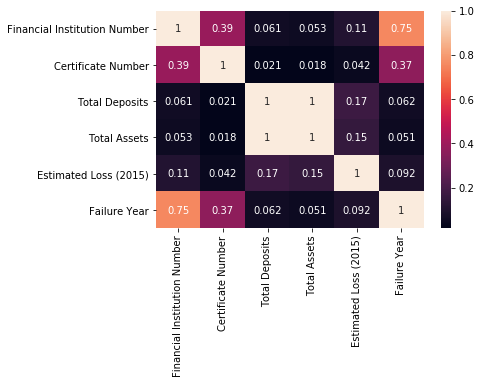

In [68]:
# Heatmap createded using seaborn to show the corrolations between all values in the dataframe
corr = banks[banks.columns].corr()
sns.heatmap(corr, annot = True)

In [69]:
# Grouping institutions by failure year and counting the amount failed in each year
banks.groupby('Failure Year')['Institution Name'].agg('count')

Failure Year
1934      9
1935     25
1936     69
1937     75
1938     74
1939     60
1940     43
1941     15
1942     20
1943      5
1944      2
1945      1
1946      1
1947      5
1948      3
1949      4
1950      4
1951      2
1952      3
1953      2
1954      2
1955      5
1956      2
1957      1
1958      4
1959      3
1960      1
1961      5
1962      1
1963      2
       ... 
1986    161
1987    217
1988    232
1989    530
1990    380
1991    268
1992    178
1993     50
1994     15
1995      8
1996      6
1997      1
1998      3
1999      8
2000      7
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    154
2011     92
2012     51
2013     24
2014     18
2015      7
2016      5
2017      2
Name: Institution Name, Length: 82, dtype: int64

In [70]:
# Grouping the institutions by charter type and counting the number of failed banks in each category
banks.groupby('Charter Type').agg('count')

,Financial Institution Number,Institution Name,Institution Type,Headquarters,Failure Date,Insurance Fund,Certificate Number,Transaction Type,Total Deposits,Total Assets,Estimated Loss (2015),Failure Year,City,State
Charter Type,,,,,,,,,,,,,,
FEDERAL,657,760,760,760,760,760,672,760,760,717,590,760,760,760
FEDERAL/STATE,644,691,691,691,691,691,691,691,691,691,572,691,691,691
STATE,1582,2033,2033,2033,2033,2033,1636,2033,2033,1925,1347,2033,2033,2033


In [81]:
# Grouping banks by charter type and aggregating the mean estimated loss for each charter type
banks.groupby(['Charter Type'])['Estimated Loss (2015)'].agg('mean')

Charter Type
FEDERAL           36381.003390
FEDERAL/STATE    106485.405594
STATE             70432.242762
Name: Estimated Loss (2015), dtype: float64

Text(0,0.5,'Bank Failures')

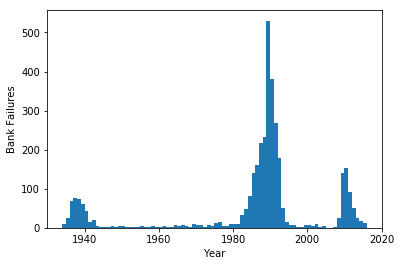

In [82]:
plt.hist(banks['Failure Year'], bins=range(1934,2017))
plt.xlabel('Year')
plt.ylabel('Bank Failures')

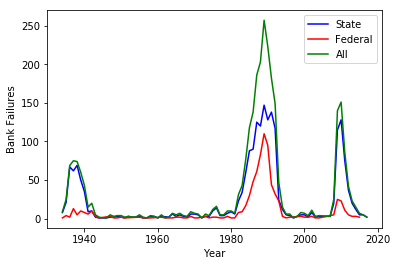

In [83]:
failure_year_type = banks.groupby(['Failure Year', 'Charter Type'], as_index=False)['Institution Name'].agg('count')
failure_year_type.columns=['Failure Year', 'Charter Type', 'Number of Failures']

failure_year_state = failure_year_type[failure_year_type['Charter Type']=='STATE']
failure_year_federal = failure_year_type[failure_year_type['Charter Type']=='FEDERAL']
failure_year_all = failure_year_type[(failure_year_type['Charter Type']=='STATE') | (failure_year_type['Charter Type']=='FEDERAL')]
failure_year_all = failure_year_all.groupby('Failure Year', as_index=False)['Number of Failures'].agg('sum')

plt.plot(failure_year_state['Failure Year'], failure_year_state['Number of Failures'], 'b-')
plt.plot(failure_year_federal['Failure Year'], failure_year_federal['Number of Failures'], 'r-')
plt.plot(failure_year_all['Failure Year'], failure_year_all['Number of Failures'], 'g-')


plt.xlabel('Year')
plt.ylabel('Bank Failures')
plt.legend(['State', 'Federal', 'All'])



In [74]:
#creating a table that converts dollar vals to 2017 vals
conversion_df = pd.read_csv('inflation.csv')
banks_inflation = pd.merge(banks, conversion_df, left_on='Failure Year', right_on='year')
banks_inflation.columns

Index(['Financial Institution Number', 'Institution Name', 'Institution Type',
       'Charter Type', 'Headquarters', 'Failure Date', 'Insurance Fund',
       'Certificate Number', 'Transaction Type', 'Total Deposits',
       'Total Assets', 'Estimated Loss (2015)', 'Failure Year', 'City',
       'State', 'year', 'inflation_multiplier'],
      dtype='object')

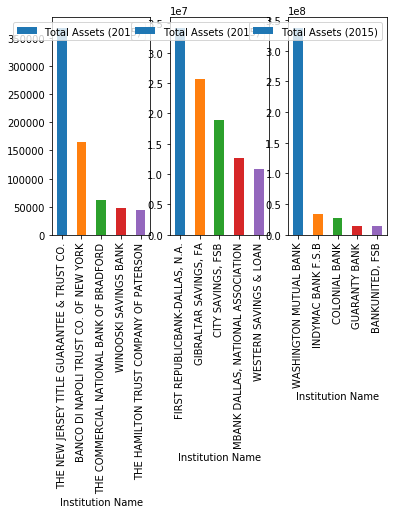

In [60]:
# Adjusting the banks for inflation for the range of three seperate periods of time.
# Then we sort the values by Institution Name and Total Assets (2015)
# Then we plot thos values and compare the bar plots of each 
banks_inflation['Total Assets (2015)']=banks_inflation['Total Assets']*banks_inflation['inflation_multiplier']
year_range_1 = range(1934, 1943)
year_range_2 = range(1980, 1990)
year_range_3 = range(2000, 2015)
banks_1 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_1)].sort_values('Total Assets (2015)', ascending=False).head(5)
banks_2 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_2)].sort_values('Total Assets (2015)', ascending=False).head(5)
banks_3 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_3)].sort_values('Total Assets (2015)', ascending=False).head(5)

fig, axes = plt.subplots(nrows=1, ncols=3)
banks_1.plot.bar(x='Institution Name', y='Total Assets (2015)', ax=axes[0])
banks_2.plot.bar(x='Institution Name', y='Total Assets (2015)', ax=axes[1])
banks_3.plot.bar(x='Institution Name', y='Total Assets (2015)', ax=axes[2])

In [50]:
# I have not idea why we're doing this...
banks['Failure Date'].unique()

array(['4/19/1934 ', '5/28/1934 ', '7/18/1934 ', ..., '9/23/2016 ',
       '1/13/2017 ', '1/27/2017 '], dtype=object)

,State,Institution Name
44,TX,736
4,CA,236
14,IL,181
9,FL,178
37,OK,170


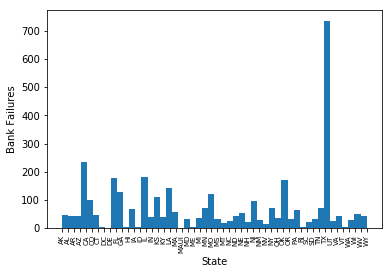

In [34]:
# We are plotting the histogram of the Bank Failures by State and printing the States with the top 5 banks failures  
plt.hist(banks['State'],bins=50)
plt.xticks(fontsize=7,rotation=90)
plt.xlabel('State')
plt.ylabel('Bank Failures')

banks_by_state = banks.groupby('State', as_index=False)['Institution Name'].agg('count')
banks_by_state.sort_values(by='Institution Name', ascending=False).iloc[0:5]

In [35]:
# Grouping the banks by State and the summation of their Estimated Loss (2015) data
banks.groupby('State', as_index=False)['Estimated Loss (2015)'].agg('sum')

,State,Estimated Loss (2015)
0,AK,471559.0
1,AL,4606439.0
2,AR,3269028.0
3,AZ,5734352.0
4,CA,26625092.0
5,CO,4229034.0
6,CT,2631253.0
7,DC,308748.0
8,DE,249.0
9,FL,16861759.0


In [36]:
# Top five banks with estimated losses
banks_by_state = banks.groupby('State', as_index=False)['Estimated Loss (2015)'].agg('count')
banks_by_state.sort_values(by='Estimated Loss (2015)', ascending=False).iloc[0:5]


,State,Estimated Loss (2015)
44,TX,647
4,CA,191
9,FL,158
14,IL,125
18,LA,121
